# Extracting the MFCCs and storing them
The first cell shows the libraries imported. Librosa has been used for extraction as it has a direct option for extracing MFCCs, and it also works for mp3 files.

In [ ]:
#Libraries required
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing

This was used by me to test the feature of librosa in how it extracts mfccs, and how to obtain the shape of mfccs and so on for future use.

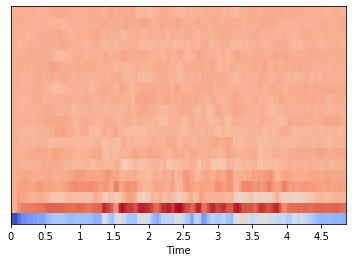

In [8]:
#MFCC test
a, sr = librosa.load("test3.mp3", duration=10)
mfcc = librosa.feature.mfcc(y=a, sr=sr, n_mfcc=20)
mfcc.shape
rows, columns = mfcc.shape
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

I used two methods of data extraction; the first one involved extracting up to 15000 samples of data from the audio files with 50 timestamps used for each audio sample; I further split up each audio file that had a higher number of time stamps. The second method I used was to get the first 2 seconds from every audio clip and run that through the Neural Network. The code below is the method used to get the headings for both data extraction methods.

Other methods I saw online usually involved longer clips; the problem I found was that the clips here were all of varying lengths, some close to 1 minute, some 5 minutes. So I tried both the methods above.

In [33]:
#Assigning labels for first method of data extraction
header = "filename"
for i in range(1, 51):
    header += f' seq{i}'
header += ' label'
header = header.split()

In [33]:
#Assigning labels for second method of data extraction
header = "filename"
for i in range(1,87):
    header += f' seq{i}'
header += ' label'
header = header.split()

In [34]:
print(header)

['filename', 'seq1', 'seq2', 'seq3', 'seq4', 'seq5', 'seq6', 'seq7', 'seq8', 'seq9', 'seq10', 'seq11', 'seq12', 'seq13', 'seq14', 'seq15', 'seq16', 'seq17', 'seq18', 'seq19', 'seq20', 'seq21', 'seq22', 'seq23', 'seq24', 'seq25', 'seq26', 'seq27', 'seq28', 'seq29', 'seq30', 'seq31', 'seq32', 'seq33', 'seq34', 'seq35', 'seq36', 'seq37', 'seq38', 'seq39', 'seq40', 'seq41', 'seq42', 'seq43', 'seq44', 'seq45', 'seq46', 'seq47', 'seq48', 'seq49', 'seq50', 'label']


In [35]:
file = open('NEWts5lang.csv', 'w', newline='')
#file = open('ts5lang.csv', 'w', newline='')

In [36]:
with file:
    writer = csv.writer(file)
    writer.writerow(header)

These are the 5 languages we eventually chose to get our data from. I further reduced it to 3 languages, Turkish, Dutch and Swedish. However I did try the network on the data from 5 languages as well. 

In [37]:
languages = 'Turkish Dutch Swedish Mongolian Persian'.split()

In [38]:
languages

['Turkish', 'Dutch', 'Swedish', 'Mongolian', 'Persian']

This is code from the initial method of data extraction I used, which was to take the mean of each individual mfcc and store it into a csv file. This did not work effectively, because the data was not in the form of a sequence of time stamps when mean is taken for each mfcc. Coincidentally, it gave me 78% accuracy on certain test data, however failed for the other test data I tried.

In [12]:
#Data with mean of each mfcc
for l in languages:
    i=0
    for filename in os.listdir(f'./data/{l}/clips'):
        audioname = f'./data/{l}/clips/{filename}'
        a, sr = librosa.load(audioname, duration=10)
        mfcc = librosa.feature.mfcc(y=a, sr=sr, n_mfcc=20)
        to_append = f'{filename}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {l}'
        file = open('5langmfcc.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
        i = i + 1
        if i >= 3000:
            break

PermissionError: [Errno 13] Permission denied: '5lmfcc.csv'

This is the code used to extract the MFCCs and store them in the csv file that was previously created and given a heading for the very same purpose. This code processes data in this way:
It takes the complete mfccs of an audio file, splits it into units of 50 and stores them as such. This gave decent results. although problems might have been the fact that I took only 3000 samples of 50 units instead of 3000 audio files as a whole. This might have resulted in slightly less effectiveness of the dataset in predictions.

In [39]:
#data with mean of each time slot
for l in languages:
    i=0
    for filename in os.listdir(f'./data/{l}/clips'):
        audioname = f'./data/{l}/clips/{filename}'
        a, sr = librosa.load(audioname, duration=10)
        mfcc = librosa.feature.mfcc(y=a, sr=sr, n_mfcc=20)
        rows, columns = mfcc.shape
        for k in range(0,10):
            if columns<=50*k+50:
                break
            if columns>=50*k+50:
                to_append = f'{filename}'
                i = i+1
                for j in range(50*k+0,50*k+50):
                    to_append += f' {np.mean(mfcc[:,j])}'
                to_append += f' {l}'
                file = open('NEWts5lang.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
        if i>=3000:
            break

209
234
238
298
211
177
186
212
135
175
178
204
160
150
144
123
115
111
244
163
152
210
149
182
243
171
174
200
223
161
229
178
249
196
118
158
181
136
108
211
184
199
173
145
142
208
203
279
217
158
307
214
169
193
213
175
217
196
186
157
219
196
139
198
193
141
170
155
157
136
222
162
196
213
177
177
141
186
187
217
143
149
148
170
131
179
144
140
159
148
178
167
152
131
107
133
129
194
126
105
117
133
159
175
167
146
79
77
117
104
155
113
139
122
120
119
132
286
423
182
217
180
193
149
134
177
167
198
198
151
162
203
211
191
170
177
146
172
211
155
186
160
160
167
139
108
136
268
160
177
186
144
141
149
144
253
157
180
110
286
152
145
192
201
159
182
203
184
155
224
191
200
241
126
205
200
158
187
172
162
151
118
191
217
126
157
194
157
147
248
193
234
157
206
153
171
203
170
158
161
164
163
120
146
181
169
160
143
161
163
162
159
117
166
144
156
165
131
153
136
127
184
196
163
165
155
201
227
399
222
244
146
174
149
274
206
215
178
209
196
156
149
137
190
165
151
115
121
143
188
19

140
112
133
76
196
133
105
174
169
168
123
140
121
147
303
152
206
290
183
150
109
137
203
218
199
213
145
163
127
129
178
113
230
155
193
188
153
325
191
219
203
162
172
239
246
196
168
170
330
180
234
155
113
129
126
134
175
87
129
136
77
263
136
144
272
164
191
162
120
155
92
110
208
144
222
110
167
337
361
198
193
172
212
205
166
179
152
229
229
286
306
296
203
237
193
113
219
137
159
140
125
123
312
211
123
136
149
165
175
141
136
112
222
120
186
151
153
188
167
141
118
126
123
129
72
219
182
204
121
278
105
176
186
180
222
180
165
97
95
158
104
141
160
162
167
115
146
131
136
163
159
91
98
110
136
337
167
170
208
139
252
186
179
178
223
169
132
134
163
112
119
127
101
159
156
137
150
132
115
134
141
138
122
129
111
117
125
153
120
222
244
175
136
141
250
234
165
167
213
125
168
116
134
109
115
140
186
126
170
103
121
114
168
104
119
104
128
129
141
123
114
176
117
177
244
298
145
172
138
129
153
192
143
129
171
148
142
133
179
148
221
146
128
131
126
145
117
114
148
150
163
161
1

208
296
363
219
229
182
180
219
177
232
175
206
198
344
342
210
205
240
208
149
139
193
141
239
217
242
149
275
206
268
219
208
157
139
217
211
118
211
134
115
291
206
162
134
291
170
222
206
186
206
131
165
167
346
188
234
299
239
217
263
279
129
186
193
177
155
146
136
126
165
239
182
242
224
167
188
157
201
286
222
275
172
188
141
188
177
160
211
170
136
155
120
141
167
162
392
265
289
193
227
237
291
198
134
258
118
239
155
180
196
160
115
180
172
165
244
141
213
162
242
188
206
126
219
248
201
341
180
304
253
356
229
157
217
141
213
180
242
144
120
217
113
151
219
149
203
237
217
144
213
180
208
110
275
203
248
186
296
177
100
191
146
265
182
237
120
208
211
206
136
144
144
253
253
172
196
162
224
265
139
253
244
201
134
203
198
208
250
113
217
146
155
296
155
371
129
133
301
146
309
140
159
252
249
144
180
143
155
264
166
172
205
153
146
142
197
246
203
271
156
231
130
148
120
169
209
174
142
143
195
138
414
148
143
147
263
143
246
126
133
201
140
228
204
275
137
164
317
117
119


This is the other method of data extraction I used, whereby I extracted the entire mfcc from each audio file, then stored only the meaned mfccs of the first two seconds of each audio file. This was done to have a common length for all the data points, however this method clearly neglected some key information from a lot of these clips and hence might not have worked as well. Another idea I had was to extract data from 3000 audio samples, but using methods similar to the first one, so that even though there would be many data points then, the network might have performed better on learning the data. 

In [18]:
for l in languages:
    i=0
    for filename in os.listdir(f'./data/{l}/clips'):
        i = i + 1
            audioname = f'./data/{l}/clips/{filename}'
            a, sr = librosa.load(audioname, duration=10)
            mfcc = librosa.feature.mfcc(y=a, sr=sr, n_mfcc=20)
            rows, columns = mfcc.shape
            if columns >=87:
                to_append = f'{filename}'
                for j in range(1,87):
                    to_append += f' {np.mean(mfcc[:,j])}'
                to_append += f' {l}'
                file = open('ts5lang.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
            if i >= 3000:
                break